In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def GenerateInterval(z0,lmbda):
  #'Generate lambda-interval 
  #'
  #'@param z0 point in the unit interval. 
  #'@param lambda locality parameter.
  #'@return lambda-interval of z0.
    lambda_interval = []
    for d in range(len(z0)):
        z = z0[d]
        if (z < lmbda/2):
            u_min = 0
            u_max = lmbda
        elif (z < 1 - lmbda/2):
            u_min = z - lmbda/2
            u_max = z + lmbda/2
        else:
            u_min = 1 - lmbda 
            u_max = 1
        lambda_interval.append((u_min,u_max))
    
    return lambda_interval

In [3]:
def IsInInterval(x, interval):
  #'Evaluate wether a given point belongs to the given interval. 
  #'
  #'@param x point in the unit interval. 
  #'@param interval vector of length two indicating interval limits. 
  #'@return boolean indicating wether x belongs to the given interval.
    m= len(x)
    index = 0
    for d in range(0,m):
        if (x[d] > interval[d][0]) and (x[d] < interval[d][1]):
            index +=1
    if index == m:
        return True
    else:
        return False

In [4]:
def CountAvailableObservations(z0, X, lmbda):
  #' Count observations in the lambda-interval of a point.  
  #'
  #'@param z0 point in the unit interval. 
  #'@param X observation matrix.
  #'@return number of samples in the lambda-interval of z0.
    interval = GenerateInterval(z0,lmbda)
    
    m,n = X.shape
    count = 0
    for i in range(0,m):
        condition = IsInInterval(x = X[i], interval = interval)
        if condition:
            count+=1
    return count

In [5]:
def RunSimulation1(lmbda,p,n0,n1,N):
      #' Run simulation. 
  #'
  #'@param lambda locality parameter.
  #'@param z0 point in the unit interval. 
  #'@param n0 number of samples in the observation matrix.
  #'@param n1 number of samples in the prediction matrix.
  #'@param N number of times to run the count.
  #'@return vector of fraction counts. 
  
  # Run over simulation iterations. 
    counter = []
    for i in range(0,N):
      # Generate random observation samples.  
        X = np.random.random((n0, p))
      # Generate prediction grid.
        sample = np.random.random((n1, p))
        
        for j in range(0,n1):
            count = CountAvailableObservations(sample[j], X, lmbda)
            counter.append(count)

    return np.array(counter)/n1

In [6]:
# number of sample points
n0 = 100
n1 = 100
N = 100
fraction_dimension = []
for p in range(0,11):
    fraction_edge = []
    for lmbda in np.linspace(0,1,11):
        H = RunSimulation1(lmbda, p,n0, n1 , N)
        fraction_edge.append(np.mean(H))
    fraction_dimension.append(fraction_edge)      

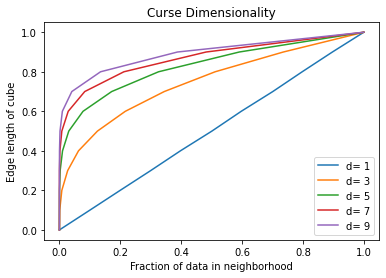

In [29]:
y = np.linspace(0,1,11)
plt.xlabel("Fraction of data in neighborhood")
plt.ylabel("Edge length of cube")
plt.title("Curse Dimensionality")
for i in range(len(fraction_dimension[0])):
    if i%2 == 0:
        continue
    x = fraction_dimension[i]
    plt.plot(x,y,label = 'd= %s'%i)
plt.legend()
plt.show()